In [14]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [15]:
data = pd.read_csv(f'{Project}/Documents/Revision_prep/Experiments/Glul_KO_KD/KD/v20241008/Markers-level-siGlul_result.tsv', sep='\t')
data_dict = {gene : {k: list(v) for k, v in data.groupby('Cond')[gene]} for gene in ['Glul','Pparg2','Fabp4','Ucp1','Cox8b']}

display(data_dict, data)

{'Glul': {'D0_siCtl': [0.982320732, 1.01799745],
  'D4_siCtl': [3.667870694, 3.400621807, 4.076762349],
  'D4_siGlul': [1.21690655, 1.338649506, 1.341947146]},
 'Pparg2': {'D0_siCtl': [0.908423444, 1.100808226],
  'D4_siCtl': [100.2460659, 101.7908527, 114.2480109],
  'D4_siGlul': [0.654402584, 0.637267002, 0.74265328]},
 'Fabp4': {'D0_siCtl': [1.013857256, 0.986332143],
  'D4_siCtl': [277.3401828, 278.1022391, 319.9659295],
  'D4_siGlul': [15.63691123, 13.2549328, 15.2311622]},
 'Ucp1': {'D0_siCtl': [1.06394049, 0.939902193],
  'D4_siCtl': [5.35603883, 15.55708992, 8.069337424],
  'D4_siGlul': [1.232255143, 1.572489542, 1.371394512]},
 'Cox8b': {'D0_siCtl': [1.048315717, 0.953911101],
  'D4_siCtl': [773.9108414, 889.4737645, 893.2742981],
  'D4_siGlul': [3.225915636, 2.688397316, 2.082074289]}}

,Cond,Glul,Fabp4,Pparg2,Ucp1,Cox8b
0,D0_siCtl,0.982321,1.013857,0.908423,1.063940,1.048316
1,D0_siCtl,1.017997,0.986332,1.100808,0.939902,0.953911
2,D4_siCtl,3.667871,277.340183,100.246066,5.356039,773.910841
3,D4_siCtl,3.400622,278.102239,101.790853,15.557090,889.473765
4,D4_siCtl,4.076762,319.965930,114.248011,8.069337,893.274298
5,D4_siGlul,1.216907,15.636911,0.654403,1.232255,3.225916
6,D4_siGlul,1.338650,13.254933,0.637267,1.572490,2.688397
7,D4_siGlul,1.341947,15.231162,0.742653,1.371395,2.082074


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_37916/2188552533.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Cond", y=gene,
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_37916/2188552533.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Cond", y=gene,
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_37916/2188552533.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Cond", y=gene,
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_37916/218855

<Figure size 640x480 with 0 Axes>

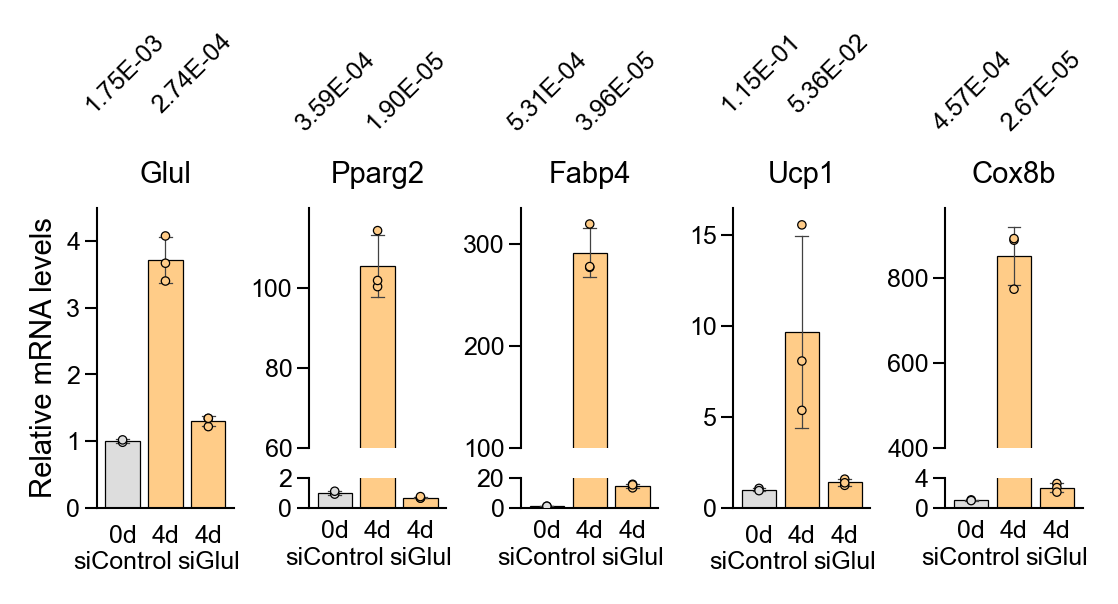

In [39]:
err_kw = dict(lw=0.5, capsize=3, capthick=0.5)

sF = 1 # Size factor
wgap = 0.25
hgap = 0.1
nrow, ncol = 2, 5

width_ratios = [1/7*3 +1/70*2]*len(data_dict)
height_ratios = [0.8, 0.1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

col = 0
for gene in data_dict:

    if gene in ['Glul','Ucp1']:
        ax = fig.add_subplot(grid[:,col])

        sns.barplot(data=data, x="Cond", y=gene,
                    palette=['#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                    width=0.8,
                    errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                    ax=ax, linewidth = 0.3, edgecolor='k',
                    legend=False)

        sns.stripplot(data=data, x="Cond", y=gene,
                    palette=['#DDDDDD','#FFCC88','#FFCC88'],
                    size=2, linewidth=0.3, edgecolor='k',
                    jitter=False,
                    legend=False)

        ax.set_xlim(-0.6, 2.6)
        ax.set_ylim(0, {'Glul':4.5,'Ucp1':16.5}[gene])
        ax.set_xticks(range(3))
        ax.set_xticklabels(['0d\nsiControl','4d','4d\nsiGlul'])
        ax.tick_params(width=0.5, length=3, pad=1)
        ax.tick_params(axis='x', length=0, pad=4)

        ax.set_title(gene, fontsize=7)
        ax.set_xlabel('')
        ax.set_ylabel('', labelpad=2)
        if col==0 : ax.set_ylabel('Relative mRNA levels', labelpad=2)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)

        # Unpaired T-test
        from scipy import stats
        stat, pv = stats.ttest_ind(data_dict[gene]['D0_siCtl'], data_dict[gene]['D4_siCtl'])
        ax.text(0.2, 1.3,f'{pv:.2E}', transform=ax.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=45)
        stat, pv = stats.ttest_ind(data_dict[gene]['D4_siCtl'], data_dict[gene]['D4_siGlul'])
        ax.text(0.7, 1.3,f'{pv:.2E}', transform=ax.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=45)


    if gene in ['Pparg2','Fabp4','Cox8b']:
        # Top
        ax = fig.add_subplot(grid[0,col])

        sns.barplot(data=data, x="Cond", y=gene,
                    palette=['#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                    width=0.8,
                    errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                    ax=ax, linewidth = 0.3, edgecolor='k',
                    legend=False)

        sns.stripplot(data=data, x="Cond", y=gene,
                    palette=['#DDDDDD','#FFCC88','#FFCC88'],
                    size=2, linewidth=0.3, edgecolor='k',
                    jitter=False,
                    legend=False)

        ax.set_xlim(-0.6, 2.6)
        ax.set_ylim(bottom={'Pparg2':60,'Fabp4':100,'Cox8b':400}[gene])
        ax.set_xticks([])
        ax.tick_params(width=0.5, length=3, pad=1)

        ax.set_title(gene, fontsize=7)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if col==0 : ax.set_ylabel('Relative expression', labelpad=2)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)

        # Unpaired T-test
        from scipy import stats
        stat, pv = stats.ttest_ind(data_dict[gene]['D0_siCtl'], data_dict[gene]['D4_siCtl'])
        ax.text(0.2, 1.3,f'{pv:.2E}', transform=ax.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=45)
        stat, pv = stats.ttest_ind(data_dict[gene]['D4_siCtl'], data_dict[gene]['D4_siGlul'])
        ax.text(0.7, 1.3,f'{pv:.2E}', transform=ax.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=45)

        ### bottom
        ax = fig.add_subplot(grid[1,col])

        sns.barplot(data=data, x="Cond", y=gene,
                    palette=['#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
                    width=0.8,
                    errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                    ax=ax, linewidth = 0.3, edgecolor='k',
                    legend=False)

        sns.stripplot(data=data, x="Cond", y=gene,
                    palette=['#DDDDDD','#FFCC88','#FFCC88'],
                    size=2, linewidth=0.3, edgecolor='k',
                    jitter=False,
                    legend=False)

        ax.set_xlim(-0.6, 2.6)
        ax.set_ylim(0,{'Pparg2':2,'Fabp4':20,'Cox8b':4}[gene])
        ax.set_xticks([*range(3)])
        ax.set_yticks([0,{'Pparg2':2,'Fabp4':20,'Cox8b':4}[gene]])
        ax.set_xticklabels(['0d\nsiControl','4d','4d\nsiGlul'])
        ax.tick_params(width=0.5, length=3, pad=1)
        ax.tick_params(axis='x', length=0, pad=3)

        ax.set_xlabel('')
        ax.set_ylabel('')

        if col==0 : ax.text(-0.6,-6,'MSO', ha='right',fontsize=6)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)


    col += 1


plt.savefig('Markers-level-siGlul_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()